<a href="https://colab.research.google.com/github/sagar-dhital/Sagar.Dhital.BDAT1004PS-/blob/main/BDAT1004PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from html.parser import HTMLParser


In [2]:
#Question 1
# Loading Dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

#Analysis:
#Mean age per occupation
users.groupby('occupation')['age'].mean()

#Male ratio per occupation:
male_ratio = users[users['gender'] == 'M'].groupby('occupation').size() / users.groupby('occupation').size()
male_ratio.sort_values(ascending=False)

#Minimum and maximum age per occupation:
users.groupby('occupation')['age'].agg(['min', 'max'])

#Mean age by occupation and gender:
users.groupby(['occupation', 'gender'])['age'].mean()

#Percentage of men and women:
gender_percentage = users.groupby(['occupation', 'gender']).size() / users.groupby('occupation').size() * 100
gender_percentage


occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
programmer     F           9.090909
               M          90.909091
retired        F           7.142857
               M          92.857143
salesman       F          25.000000
               M          75.000000
scientist      F           9.677419
               M          90.322581
student        F          30.612245
               M          69.387755
technician     F           3.703704
               M          96.296296
writer         F          42.222222
               M          57.777778
dtype: float64

In [3]:
#Question 2: Euro Teams
#Loading Dataset
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

#Analysis:
#Select Goal column:
euro12['Goals']

#Number of teams:
euro12['Team'].nunique()

#Columns in dataset:
len(euro12.columns)

#Sort by Red Cards and Yellow Cards:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])

#Filter teams with >6 goals:
euro12[euro12['Goals'] > 6]


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [5]:
#Question 3: Housing
#Create Data:
series1 = pd.Series(np.random.randint(1, 5, 100))
series2 = pd.Series(np.random.randint(1, 4, 100))
series3 = pd.Series(np.random.randint(10000, 30001, 100))

#Combine into DataFrame:
df = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})


In [6]:
# Question 4: Wind Statistics
# Load Dataset
from google.colab import files
files.upload()

import pandas as pd
import numpy as np

# Load Dataset
wind = pd.read_csv('wind.txt', sep='\s+')

# Fix Year
wind['Yr'] = wind['Yr'].apply(lambda x: 1900 + x if x > 50 else 2000 + x)

# Construct Date
wind['Date'] = pd.to_datetime(wind[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'}))
wind.set_index('Date', inplace=True)

# Missing Values
print(wind.isnull().sum())

# Statistics
print(wind.describe())






Saving wind.txt to wind (4).txt
Yr     0
Mo     0
Dy     0
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
                Yr           Mo           Dy          RPT          VAL  \
count  6574.000000  6574.000000  6574.000000  6568.000000  6571.000000   
mean   1969.500304     6.523274    15.728628    12.362987    10.644314   
std       5.188131     3.448871     8.800335     5.618413     5.267356   
min    1961.000000     1.000000     1.000000     0.670000     0.210000   
25%    1965.000000     4.000000     8.000000     8.120000     6.670000   
50%    1969.500000     7.000000    16.000000    11.710000    10.170000   
75%    1974.000000    10.000000    23.000000    15.920000    14.040000   
max    1978.000000    12.000000    31.000000    35.800000    33.370000   

               ROS          KIL          SHA          BIR          DUB  \
count  6572.000000  6569.000000  6572.000000  6574.000000  6571.000000   
mean 

In [7]:
#Question 5: Chipotle Dataset
#Load Dataset:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

#Analysis:
#Most ordered item:
chipo.groupby('item_name')['quantity'].sum().idxmax()

#Revenue:
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)
chipo['total_price'] = chipo['item_price'] * chipo['quantity']
chipo['total_price'].sum()


39237.02

Saving us-marriages-divorces-1867-2014.csv to us-marriages-divorces-1867-2014 (3).csv


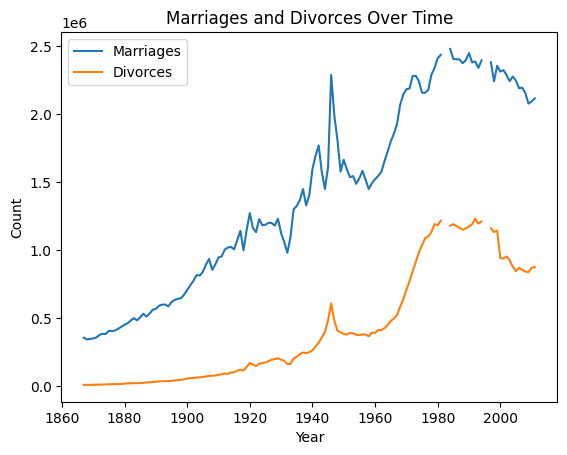

In [12]:
#Question 6: Marriages and Divorces Line Plot
#Load Dataset

from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Plot
plt.plot(df['Year'], df['Marriages'], label='Marriages')
plt.plot(df['Year'], df['Divorces'], label='Divorces')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Marriages and Divorces Over Time')
plt.show()




Index(['Year', 'Marriages', 'Divorces', 'Population', 'Marriages_per_1000',
       'Divorces_per_1000'],
      dtype='object')


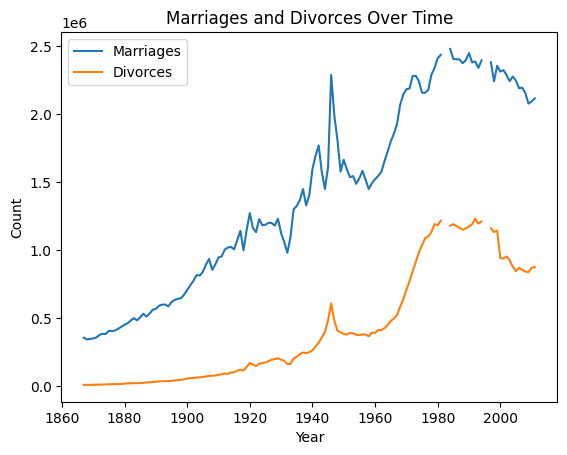

In [13]:
#Question 7: Bar Chart for 1900, 1950, and 2000
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Check column names
print(df.columns)

# Correct column name (if needed)
# Example: If the column is named 'year' in lowercase:
plt.plot(df['Year'], df['Marriages'], label='Marriages')
plt.plot(df['Year'], df['Divorces'], label='Divorces')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Marriages and Divorces Over Time')
plt.legend()
plt.show()



Saving actor_kill_counts.csv to actor_kill_counts (4).csv
Index(['Actor', 'Count'], dtype='object')


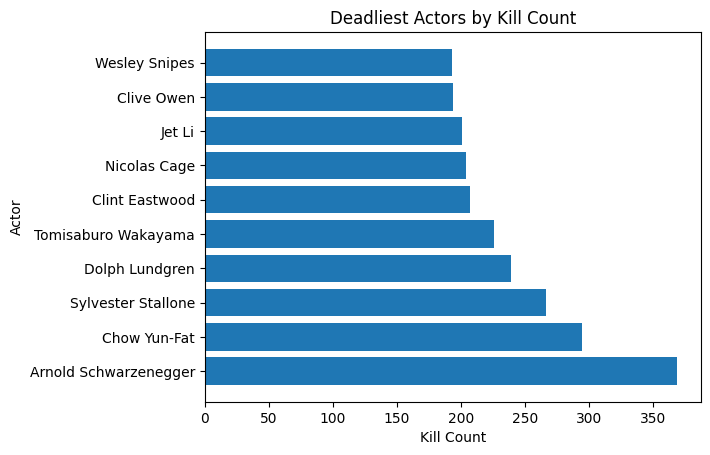

In [19]:
#Question 8: Deadliest Actors Bar Chart
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt



# Load Dataset
actors = pd.read_csv('actor_kill_counts.csv')

# Verify column names
print(actors.columns)

# Sort by Count in Descending Order
actors.sort_values(by='Count', ascending=False, inplace=True)

# Bar Plot
plt.barh(actors['Actor'], actors['Count'])
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors by Kill Count')
plt.show()




Saving roman-emperor-reigns.csv to roman-emperor-reigns.csv
    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide
Index(['Emperor', 'Length_of_Reign', 'Cause_of_Death'], dtype='object')


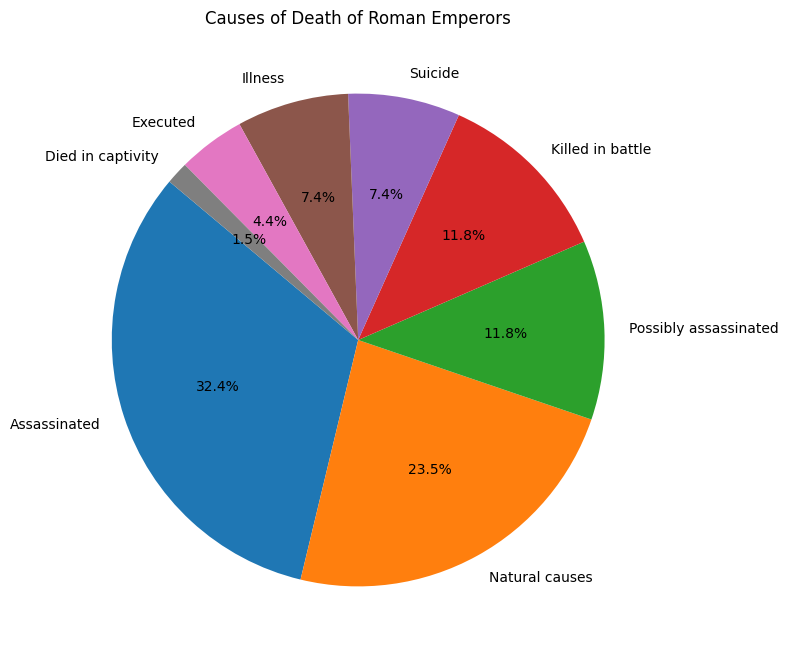

In [20]:
#Question 9 Roman Emperors Pie Chart
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# File Upload
uploaded = files.upload()

# Load Dataset
emperors = pd.read_csv('roman-emperor-reigns.csv')

# Check the dataset
print(emperors.head())
print(emperors.columns)

# Count occurrences of each cause of death
death_causes = emperors['Cause_of_Death'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(death_causes, labels=death_causes.index, autopct='%1.1f%%', startangle=140)
plt.title('Causes of Death of Roman Emperors')
plt.show()


Saving arcade-revenue-vs-cs-doctorates.csv to arcade-revenue-vs-cs-doctorates (2).csv
Index(['Year', 'Total Arcade Revenue (billions)',
       'Computer Science Doctorates Awarded (US)'],
      dtype='object')


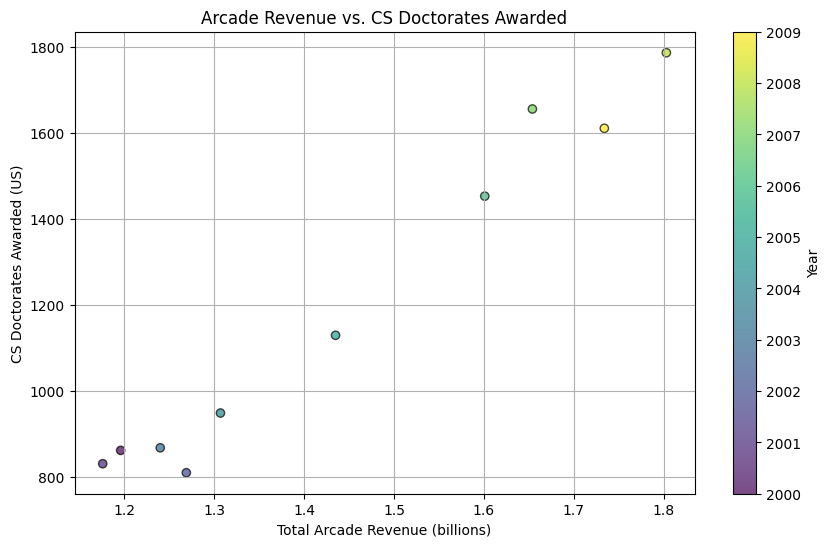

In [23]:
#Question 10 Scatter Plot for Arcade Revenue vs. CS Doctorates

import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Upload the file
uploaded = files.upload()

# Load Dataset
data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Inspect the dataset
print(data.columns)  # Verify the column names

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Total Arcade Revenue (billions)'],
            data['Computer Science Doctorates Awarded (US)'],
            c=data['Year'], cmap='viridis', edgecolor='k', alpha=0.7)

# Add labels and title
plt.colorbar(label='Year')  # Add a color bar to indicate the year
plt.title('Arcade Revenue vs. CS Doctorates Awarded')
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('CS Doctorates Awarded (US)')
plt.grid(True)
plt.show()


